# FINAL PROJECT 2

## 1. Introduction

**Kelompok 2:**
<ol>
    <li>Mohammad Arkan - PYTN-KS16-09</li>
    <li>Jonathan Calvin Limawal - PYTN-KS16-019</li>
    <li>Desi Suci Nopianti - PYTN-KS16-025</li>
</ol>

## Project Overview

Dataset yang dipakai bernama Rain in Australia yang diperoleh dari https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package. Dataset ini berisi tentang informasi pengamatan cuaca harian dari banyak lokasi di seluruh Australia selama sekitar 10 tahun. Dataset ini terdiri dari 145460 baris dan 23 kolom.

## Informasi Attribute

<ol>
    <li>Date - tanggal hari itu</li>
    <li>Location - lokasi, nama kota di Australia</li>
    <li>MinTemp - temperatur terendah hari itu dalam celcius</li>
    <li>MaxTemp - temperatur tertinggi hari itu dalam celcius</li>
    <li>Rainfall - jumlah curah hujan hari itu dalam mm</li>
    <li>Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu</li>
    <li>Sunshine - jumlah jam hari itu cerah dengan cahaya matahari</li>
    <li>WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu</li>
    <li>WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu</li>
    <li>WindDir9am - arah angin jam 9 pagi</li>
    <li>WindDir3pm - arah angin jam 3 sore</li>
    <li>WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore</li>
    <li>WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore</li>
    <li>Humidity9am - humiditas jam 9 pagi dalam persen</li>
    <li>Humidity3pm - humiditas jam 3 sore dalam persen</li>
    <li>Pressure9am - tekanan udara jam 9 pagi dalam hpa</li>
    <li>Pressure3pm - tekanan udara jam 3 sore dalam hpa</li>
    <li>Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.</li>
    <li>Cloud3pm - persentase langit yang tertutup awan jam 3 sore</li>
    <li>Temp9am - temperatur jam 9 pagi dalam celcius</li>
    <li>Temp3pm - temperatur jam 3 sore dalam celcius</li>
    <li>RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0</li>
    <li>RainTomorrow - variable yang mau di prediksi</li>
</ol>

## Objektif yang ingin dicapai

<ol>
    <li>Mampu memahami konsep Classification dengan Logistic Regression dan SVM</li>
    <li>Mampu mempersiapkan data untuk digunakan dalam model Logistic Regressiondan SVM</li>
    <li>Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi</li>
</ol>

## 2. Import Libraries

In [118]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import yeojohnson
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix,classification_report
from scipy.stats import skew
from scipy import stats

import warnings
import pickle

import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [48]:

# Mengantisipasi untuk unstandard missing values
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN', ' ', ' - ']

# Membaca dataset
weatherAUS_df = pd.read_csv('weatherAUS.csv', na_values=missing_values)

# menampilkan tampilan kolom full
pd.set_option('display.max_columns', 500)

# Menampilkan Datasett
weatherAUS_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [49]:
# Menghitung jumlah baris dan kolom
rows, columns = weatherAUS_df.shape
print('Dataset ini terdapat: ')
# Menampilkan jumlah baris
print(rows, "Rows")
# Menampilkan jumlah kolom
print(columns, "Columns")

Dataset ini terdapat: 
145460 Rows
23 Columns


In [50]:
# Melihat statistik deskriptif dari data
weatherAUS_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [51]:
# Melihat informasi tentang dataset
weatherAUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [52]:
# cek missing value
weatherAUS_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Terlihat bahwa dataset ini memiliki missing value yang banyak. Sehingga kita harus mengatasi hal tersebut.

In [53]:
# cek data categorical
categorical_features = weatherAUS_df.select_dtypes(include=['object','category']).columns.tolist()
print("Jumlah fitur categorical : {}".format(len(categorical_features)))
print("Fitur categorical :", categorical_features)

Jumlah fitur categorical : 7
Fitur categorical : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [54]:
# cek data numerical
numerical_features = weatherAUS_df.select_dtypes(include=['number']).columns.tolist()
print("Jumlah fitur numerical: {}".format(len(numerical_features)))
print("Fitur numerical :", numerical_features)

Jumlah fitur numerical: 16
Fitur numerical : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [55]:
# cek persentase missing value
data_types = pd.DataFrame(weatherAUS_df.dtypes, columns=['Data types'])
Null_count = pd.DataFrame(weatherAUS_df.isnull().sum(), columns=['Null count'])                                                    
Null_Percentage = pd.DataFrame(weatherAUS_df.isnull().sum()/weatherAUS_df.shape[0]*100, columns=['Null Percentage'])

view_null = pd.concat([data_types, Null_count, Null_Percentage], axis='columns')
view_null

,Data types,Null count,Null Percentage
Date,object,0,0.000000
Location,object,0,0.000000
MinTemp,float64,1485,1.020899
MaxTemp,float64,1261,0.866905
Rainfall,float64,3261,2.241853
Evaporation,float64,62790,43.166506
Sunshine,float64,69835,48.009762
WindGustDir,object,10326,7.098859
WindGustSpeed,float64,10263,7.055548
WindDir9am,object,10566,7.263853


In [56]:
# cek data duplicate
weatherAUS_df.duplicated().sum()

0

### Analisis terhadap dataset

Semua kolom memiliki nilai nol kecuali Tanggal dan Lokasi. Kolom di bawah ini memiliki nilai null lebih dari 38%:

- sunshine - 48.009762%
- evaporation - 43.166506%
- cloud3pm - 38.421559%
- cloud3pm - 40.807095%

Dataset ini memiliki 23 kolom dan 145460 baris. Dimana terdapat 7 kolom kategori dan 16 kolom numerik. Data memiliki 16 float64 dan 7 objek.Dtype dari Datetime adalah Objek, sehingga harus diubah menjadi DateTime. Terakhir, data tidak memiliki duplikat

## 4. Data Cleaning

### 4.1 Visualizing Numerical Columns Distribution (that have missing values)

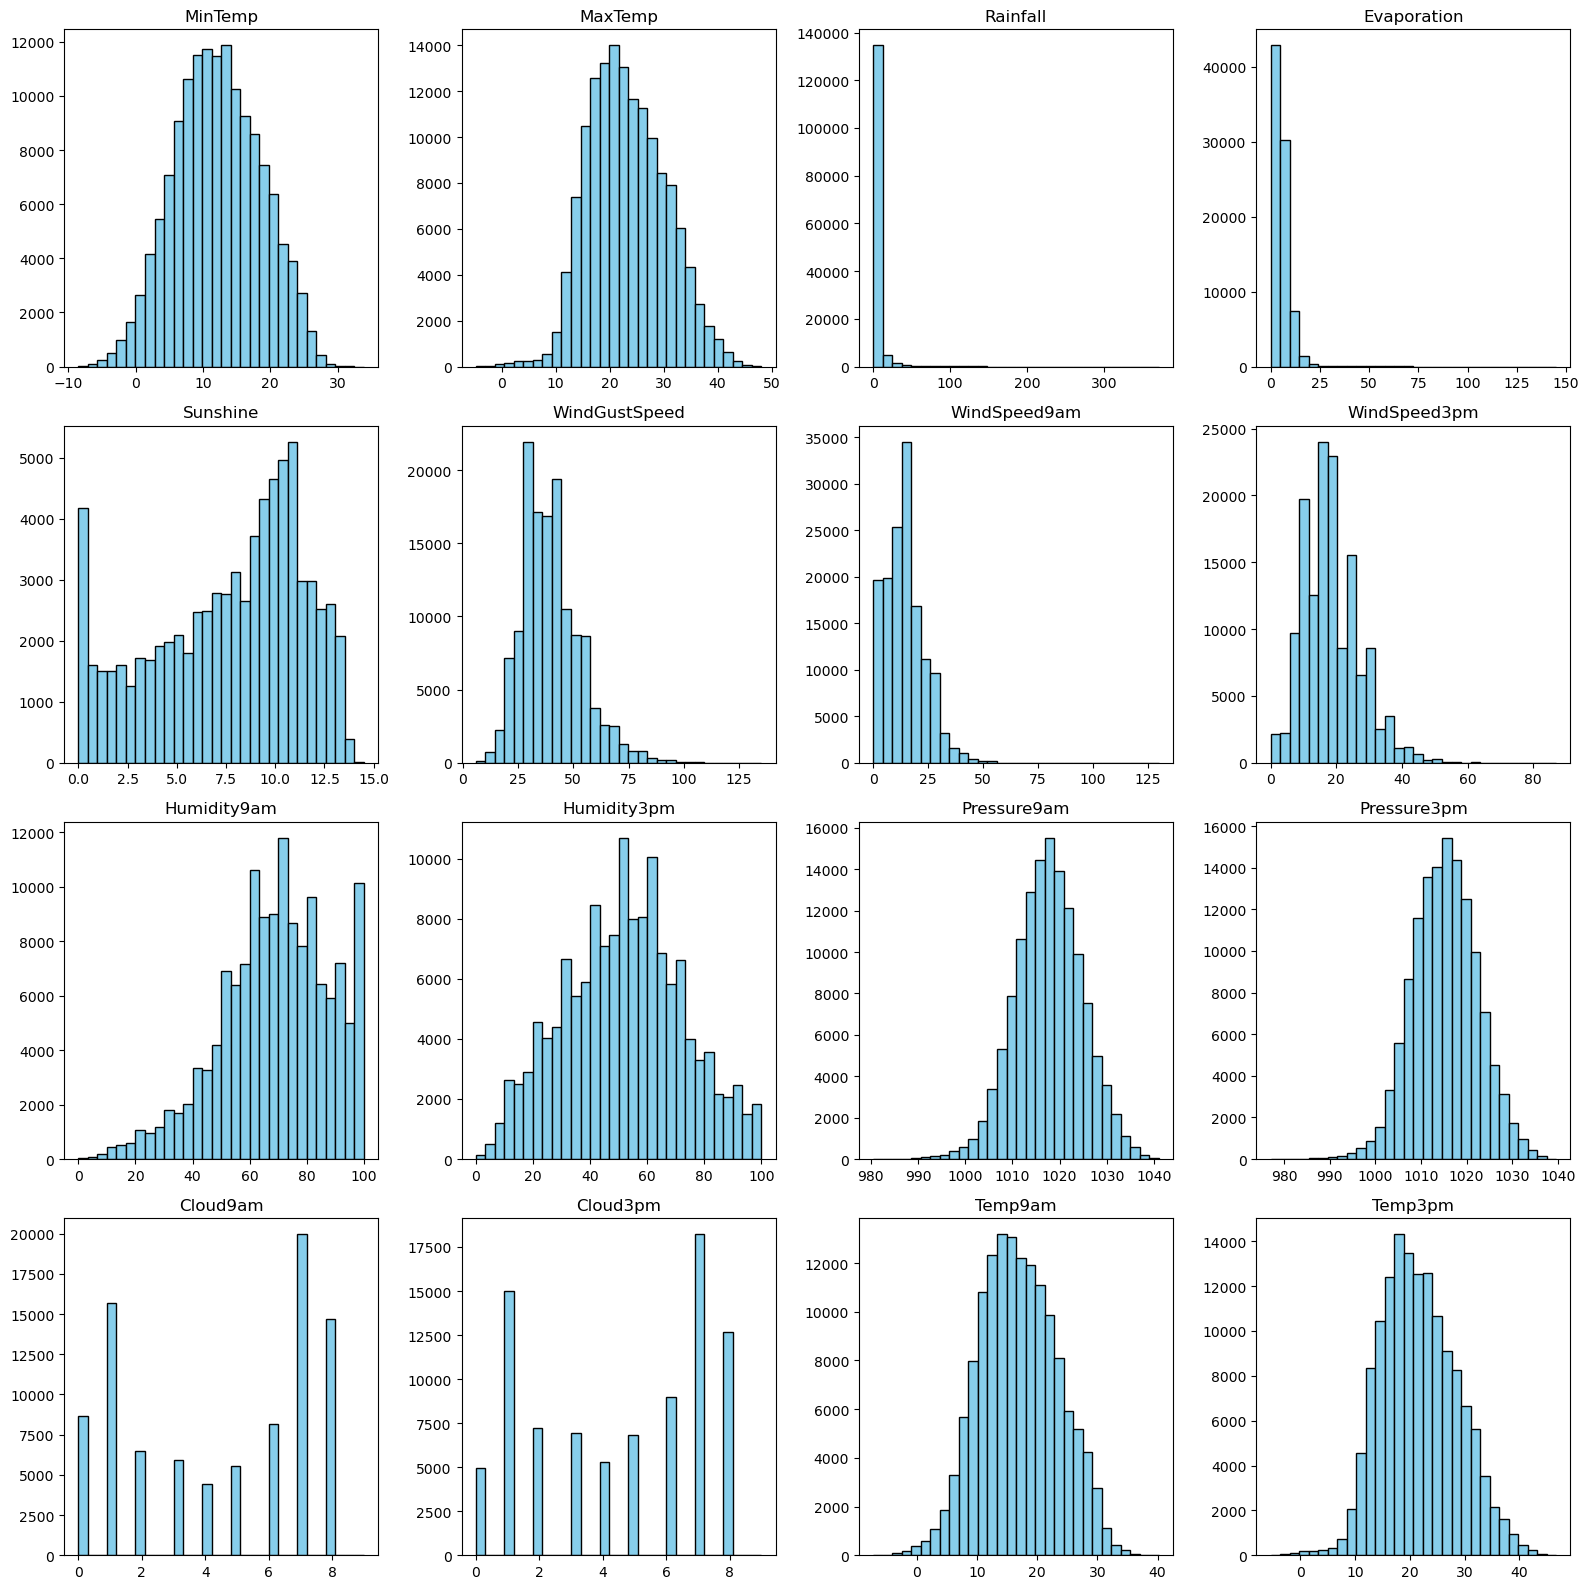

In [57]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

axes = axes.flatten()

for i, column in enumerate(numerical_features):
    ax = axes[i]
    ax.hist(weatherAUS_df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax.set_title(column)

plt.tight_layout()### 4.1 Visualizing Numerical Columns Distribution (that have missing values)

plt.show()

### 4.2 Checking Numerical Columns (that have missing values) for Outliers

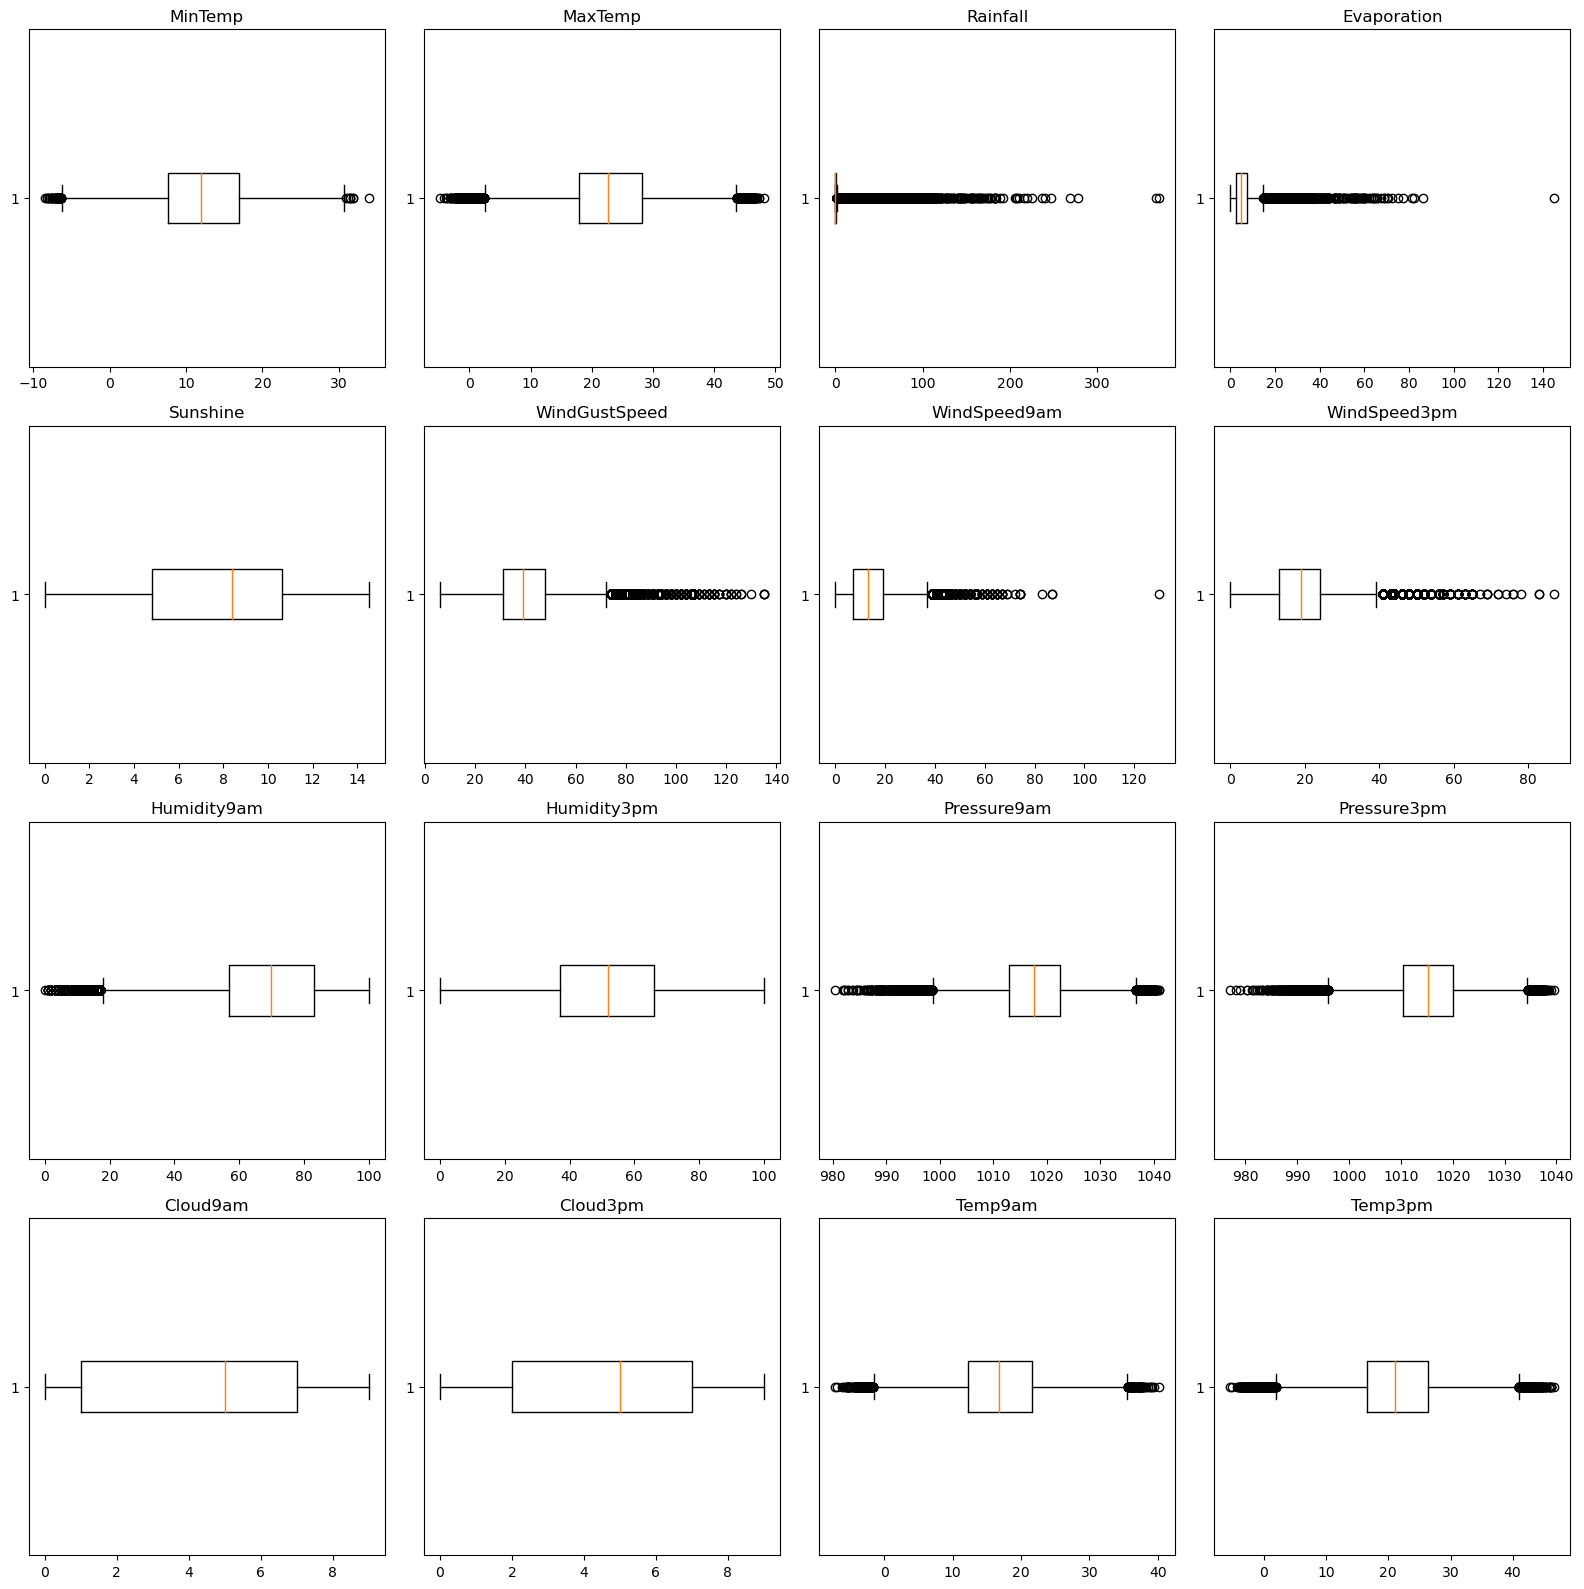

In [58]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(numerical_features):
    ax = axes[i]
    ax.boxplot(weatherAUS_df[column].dropna(), vert=False)
    ax.set_title(column)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

Dari 2 grafik di atas (Histogram dan Boxplot) terlihat bahwa banyak kolom numerikal yang memiliki distribusi yang *skewed* dan memiliki banyak *outliers*. Oleh karena itu, kami akan menggunakan teknik ***Median Imputation*** untuk mengisi *missing values* untuk kolom numerikal

**Note:**
1. Median Imputation cocok untuk mengisi *missing values* pada kolom yang *skewed* (tidak berdistribusi normal)
2. Teknik ini juga lebih *robust* terhadap *outliers* dibandingkan *Mean Imputation*.

### 4.3 Imputing Missing Values for Numerical Columns

In [59]:
weatherAUS_df[numerical_features] = weatherAUS_df[numerical_features].fillna(weatherAUS_df[numerical_features].median())

In [60]:
weatherAUS_df[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### 4.4 Imputing Missing Values for Categorical Columns (that have missing values)

In [61]:
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [62]:
weatherAUS_df[categorical_features] = weatherAUS_df[categorical_features].fillna(weatherAUS_df[categorical_features].mode().iloc[0])

In [63]:
weatherAUS_df[categorical_features].isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### 4.5 Rechecking all the columns for missing values

In [64]:
weatherAUS_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [65]:
weatherAUS_df.shape

(145460, 23)

Dataset sekarang sudah tidak memiliki missing value. Selanjutnya akan dilakukan proses convert Date ke datetime.

In [66]:
# Convert date to datetime
weatherAUS_df['Date']= pd.to_datetime(weatherAUS_df['Date'])

In [67]:
# Buat kolom baru dari date
weatherAUS_df['Year'] = weatherAUS_df['Date'].dt.year
weatherAUS_df['Month'] = weatherAUS_df['Date'].dt.month
weatherAUS_df['Day'] = weatherAUS_df['Date'].dt.day

In [68]:
# hapus kolom date
weatherAUS_df.drop('Date', axis=1, inplace=True)

In [69]:
valid_col = weatherAUS_df
weatherAUS_df.shape

(145460, 25)

In [70]:
# cek info dataset
weatherAUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

## 5. Data Splitting

In [76]:
train, test = train_test_split(weatherAUS_df, test_size=0.2, random_state=42)
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (116368, 25)
Test set size: (29092, 25)


## 6. Data Exploration

### 6. 1 Checking Numerical Columns Distribution

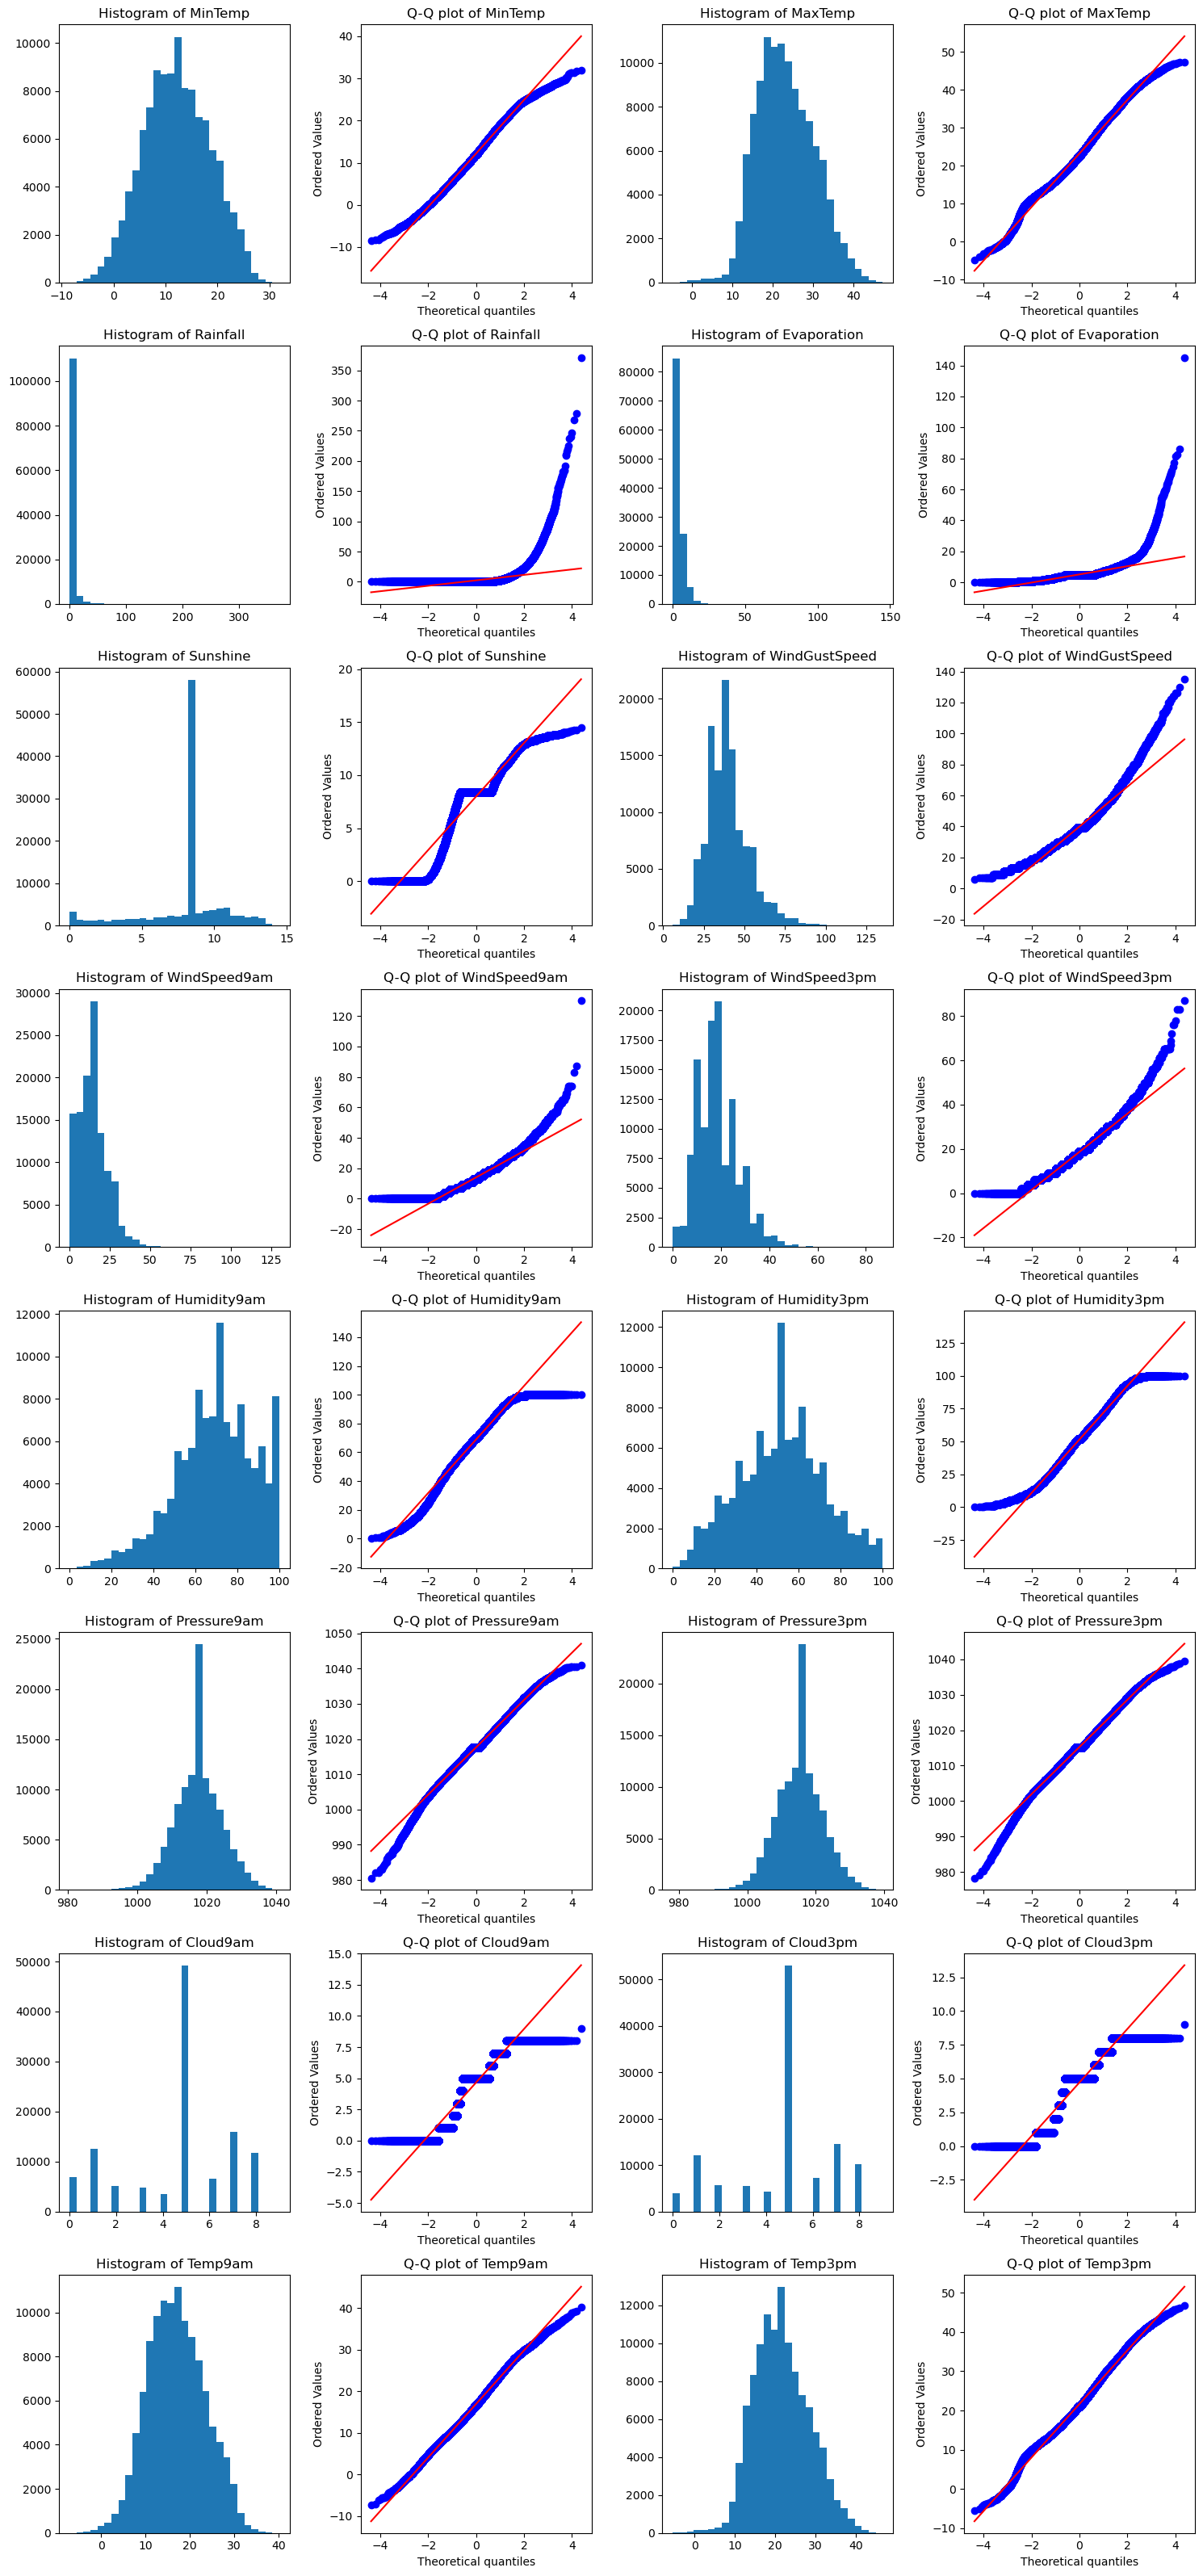

In [84]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
                     'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                     'Temp9am', 'Temp3pm']

columns_per_row = 4
num_rows = len(numerical_columns) // columns_per_row
if len(numerical_columns) % columns_per_row != 0:
    num_rows += 1

fig, axes = plt.subplots(nrows=num_rows * 2, ncols=columns_per_row, figsize=(15, num_rows * 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i * 2]
    ax.hist(train[col], bins=30)
    ax.set_title(f'Histogram of {col}')

    ax = axes[i * 2 + 1]
    stats.probplot(train[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q plot of {col}')

plt.tight_layout()
plt.show()
plt.show()

Untuk membuat data numerikal yang tidak berdistribusi normal, kita akan menggunakan teknik/metode ***Yeo-Johnson Transformation***.

Alasannya karena teknik/metode ini dapat digunakan untuk kolom yang memiliki nilai 0 dan juga negatif.

MinTemp is not normally distributed. Applying Yeo-Johnson transformation.
MaxTemp is not normally distributed. Applying Yeo-Johnson transformation.
Rainfall is not normally distributed. Applying Yeo-Johnson transformation.
Evaporation is not normally distributed. Applying Yeo-Johnson transformation.
Sunshine is not normally distributed. Applying Yeo-Johnson transformation.
WindGustSpeed is not normally distributed. Applying Yeo-Johnson transformation.
WindSpeed9am is not normally distributed. Applying Yeo-Johnson transformation.
WindSpeed3pm is not normally distributed. Applying Yeo-Johnson transformation.
Humidity9am is not normally distributed. Applying Yeo-Johnson transformation.
Humidity3pm is not normally distributed. Applying Yeo-Johnson transformation.
Pressure9am is not normally distributed. Applying Yeo-Johnson transformation.
Pressure3pm is not normally distributed. Applying Yeo-Johnson transformation.
Cloud9am is not normally distributed. Applying Yeo-Johnson transformation.

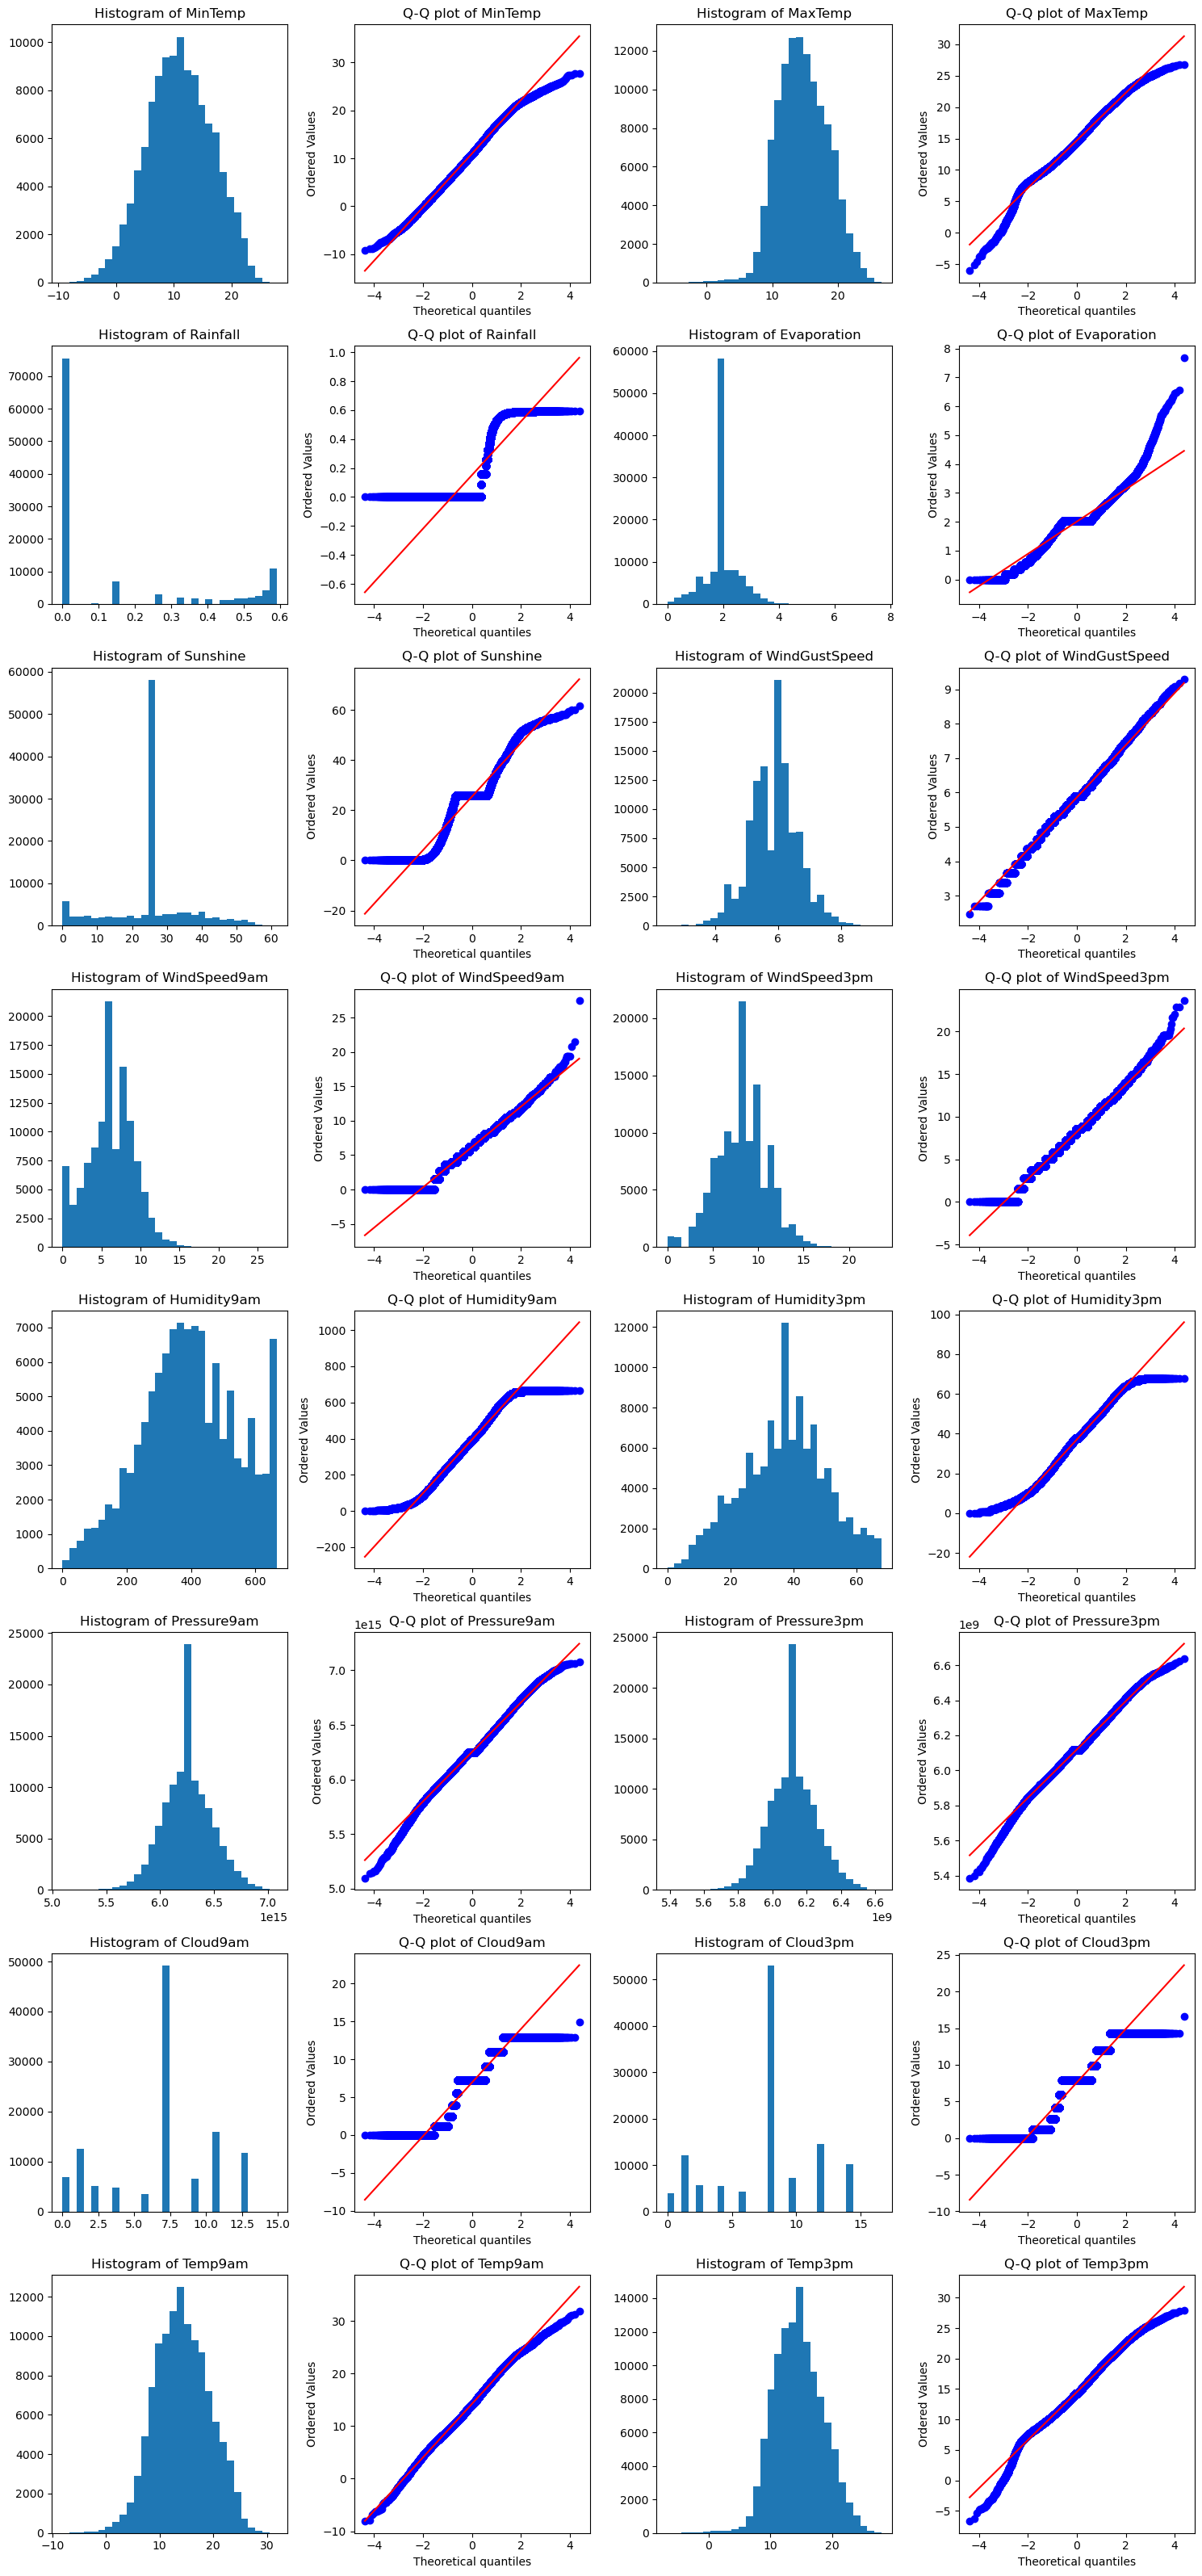

In [85]:
transformation_params = {}

columns_per_row = 4
num_rows = len(numerical_columns) // columns_per_row
if len(numerical_columns) % columns_per_row != 0:
    num_rows += 1

fig, axes = plt.subplots(nrows=num_rows * 2, ncols=columns_per_row, figsize=(15, num_rows * 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    _, p_value = stats.shapiro(train[col])
    if p_value < 0.05:
        print(f'{col} is not normally distributed. Applying Yeo-Johnson transformation.')
        
        # Menerapkan transformasi Yeo-Johnson ke data pelatihan dan menyimpan parameter
        train[col], lambda_value = yeojohnson(train[col])
        transformation_params[col] = lambda_value

    ax = axes[i * 2]
    ax.hist(train[col], bins=30)
    ax.set_title(f'Histogram of {col}')

    ax = axes[i * 2 + 1]
    stats.probplot(train[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q plot of {col}')

plt.tight_layout()
plt.show()

In [86]:
for col, lambda_value in transformation_params.items():
    test[col] = yeojohnson(test[col], lmbda=lambda_value)

### 6.2 Removing Outliers

In [87]:
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                      'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

for col in numerical_features:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Only keep rows in the dataframe that have values within the IQR
    train = train[(train[col] >= Q1 - 1.5*IQR) & (train[col] <= Q3 + 1.5*IQR)]

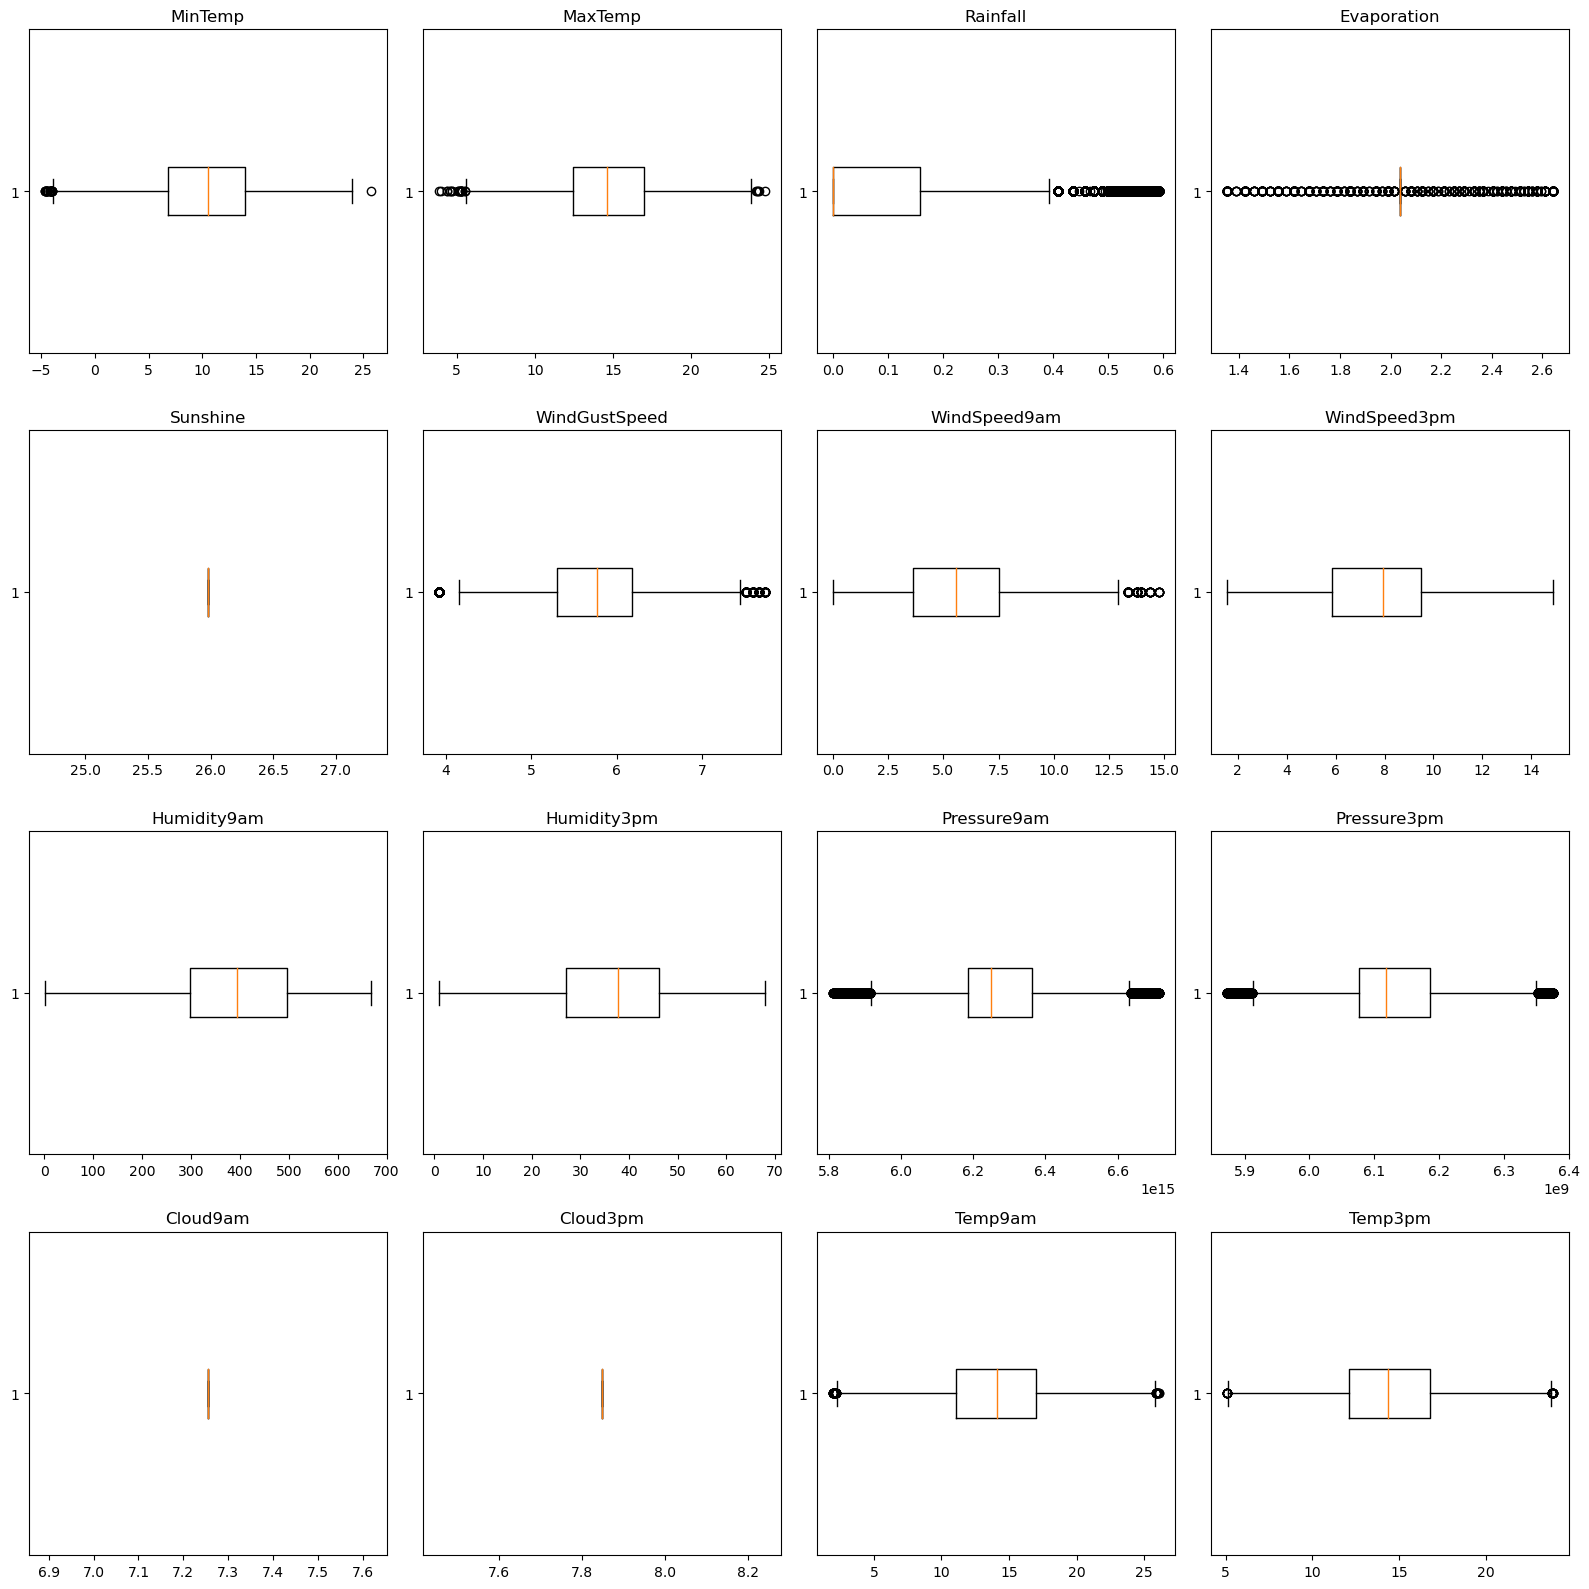

In [88]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(numerical_features):
    ax = axes[i]
    ax.boxplot(train[column].dropna(), vert=False)
    ax.set_title(column)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

#### 1. Bagaimana distribusi kolom y (target)?

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64


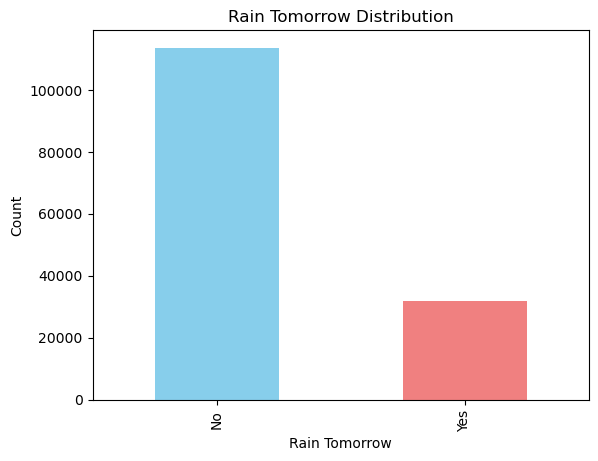

In [89]:
rain_tomorrow_counts = weatherAUS_df['RainTomorrow'].value_counts()
print(rain_tomorrow_counts)
# Plotting the bar chart
rain_tomorrow_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.title('Rain Tomorrow Distribution')

# Display the plot
plt.show()

#### 2. Tahun berapa yang memiliki curah hujan yang tertinggi?

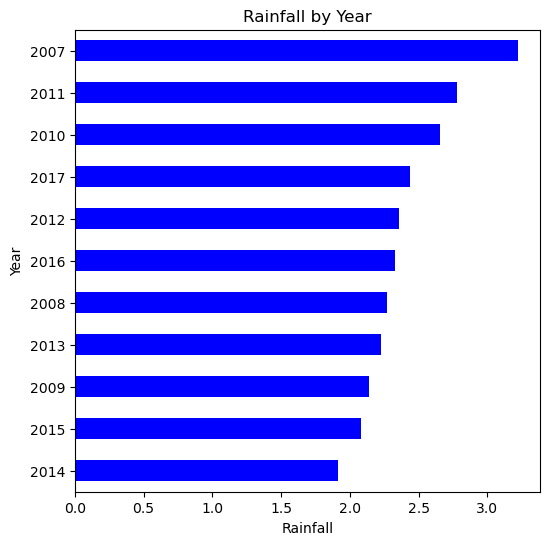

In [90]:
plt.figure(figsize=(6, 6))

location_rain = weatherAUS_df.groupby('Year')['Rainfall'].mean().sort_values().plot(kind='barh', color= 'blue')

plt.title('Rainfall by Year')
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Year', fontsize=10)
plt.show()

**Insight:**  2007 menjadi tahun yang memiliki curah hujan yang tinggi dan 2014 menjadi tahun yang memiliki curah hujan yang rendah.

#### 3.Bulan apa yang mendapat curah hujan tertinggi?

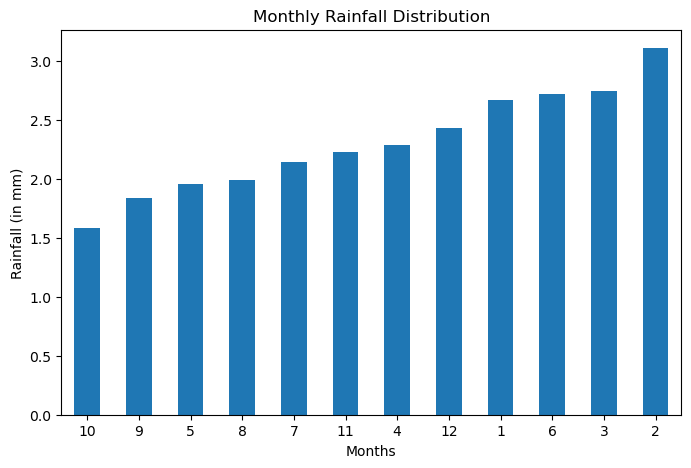

In [91]:
plt.figure(figsize=(8,5))
weatherAUS_df.groupby('Month')['Rainfall'].mean().sort_values().plot(kind='bar')

plt.title('Monthly Rainfall Distribution', fontsize=12)
plt.xlabel('Months')
plt.ylabel('Rainfall (in mm)')

plt.xticks(rotation=0)

plt.show()

**Insight:** Bulan februari menjadi bulan yang mendapatkan curah hujan yang tinggi dan bulan oktober menjadi bulan yang curah hujannya rendah.

#### 4. Hari apa yang menerima curah hujan tertinggi?

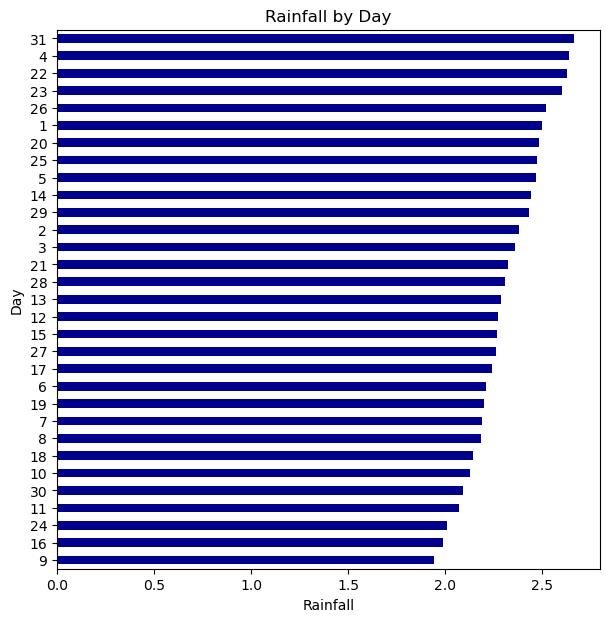

In [92]:
# Rainfall by Year
plt.figure(figsize=(7, 7))

location_rain = weatherAUS_df.groupby('Day')['Rainfall'].mean().sort_values().plot(kind='barh', color= 'darkblue')

plt.title('Rainfall by Day')
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Day', fontsize=10)
plt.show()

**Insight:** Setiap tanggal 4 curah hujan selalu tinggi dan tanggal 9 curah hujannya paling rendah.

#### 5. Lokasi mana yang menerima curah hujan tertinggi?

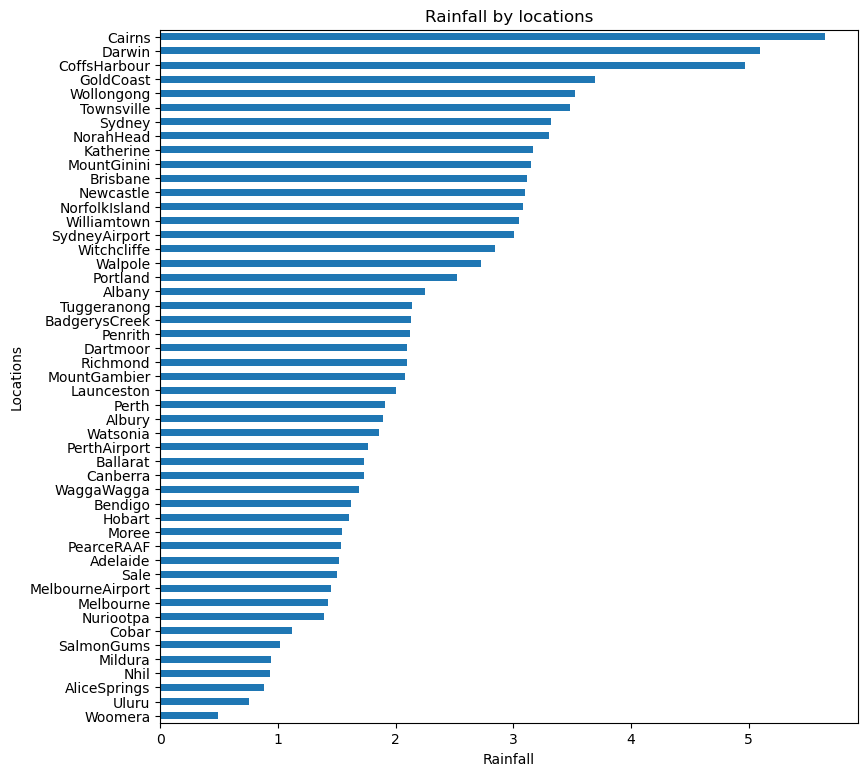

In [93]:
plt.figure(figsize=(9, 9))

location_rain = weatherAUS_df.groupby('Location')['Rainfall'].mean().sort_values().plot(kind='barh')

plt.title('Rainfall by locations')
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Locations', fontsize=10)
plt.show()

**Insight:** Wilayah Cairns menjadi wilayah yang mendapatkan curah hujan yang tinggi dan wilayah Woomera mendapatkan curah hujan yang rendah.

## 7. Data Preprocessing

### 7.1 Dropping Unrelated/Unused/Unnecessary Columns

In [94]:
columns_to_drop1 = ['Year', 'Month', 'Day']
train = train.drop(columns=columns_to_drop1)
test = test.drop(columns=columns_to_drop1)

In [95]:
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (29763, 22)
Test set size: (29092, 22)


In [96]:
train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2551,Albury,17.874289,23.014690,-0.000000,2.035258,25.977366,N,6.011471,ESE,NNW,5.564025,8.880860,211.862660,15.131888,6.251498e+15,6.078432e+09,7.254256,7.848672,21.645918,23.733027,No,No
133371,Launceston,5.336228,12.971426,-0.000000,2.035258,25.977366,NW,5.771704,NW,NW,4.832463,8.880860,515.202607,38.332564,6.533183e+15,6.330981e+09,7.254256,7.848672,10.756167,13.010398,No,No
1641,Albury,7.484745,11.864209,0.256638,2.035258,25.977366,ENE,4.150492,NNE,ESE,1.536720,4.194962,580.068254,42.868863,6.463541e+15,6.211103e+09,7.254256,7.848672,9.218930,12.003073,No,No
54163,MountGinini,8.987661,12.031725,0.529784,2.035258,25.977366,NNW,6.493133,NW,NW,8.359711,4.194962,608.638618,55.544373,6.248125e+15,6.117607e+09,7.254256,7.848672,9.462974,12.003073,Yes,Yes
20562,NorahHead,15.488036,16.228006,0.585417,2.035258,25.977366,ENE,5.151881,SSW,ENE,4.036285,9.482109,542.689809,50.519737,6.271766e+15,6.150735e+09,7.254256,7.848672,17.827279,16.228421,Yes,No


### 7.2 Feature Selection/Reduction (for numerical columns)

Untuk melihat korelasi kolom dengan data Kontinu (numerikal) dengan kolom 'RainTomorrow' yang juga merupakan kolom kategorikal, kami menggunakan **Point-Biserial Correlation**.

In [99]:
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                   'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']

In [100]:
num_df = train[numerical_columns]
num_df['RainTomorrow'] = num_df['RainTomorrow'].map({'Yes': 1, 'No': 0})

num_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
2551,17.874289,23.014690,-0.000000,2.035258,25.977366,6.011471,5.564025,8.880860,211.862660,15.131888,6.251498e+15,6.078432e+09,7.254256,7.848672,21.645918,23.733027,0
133371,5.336228,12.971426,-0.000000,2.035258,25.977366,5.771704,4.832463,8.880860,515.202607,38.332564,6.533183e+15,6.330981e+09,7.254256,7.848672,10.756167,13.010398,0
1641,7.484745,11.864209,0.256638,2.035258,25.977366,4.150492,1.536720,4.194962,580.068254,42.868863,6.463541e+15,6.211103e+09,7.254256,7.848672,9.218930,12.003073,0
54163,8.987661,12.031725,0.529784,2.035258,25.977366,6.493133,8.359711,4.194962,608.638618,55.544373,6.248125e+15,6.117607e+09,7.254256,7.848672,9.462974,12.003073,1
20562,15.488036,16.228006,0.585417,2.035258,25.977366,5.151881,4.036285,9.482109,542.689809,50.519737,6.271766e+15,6.150735e+09,7.254256,7.848672,17.827279,16.228421,0


In [101]:
from scipy.stats import pointbiserialr

for col in numerical_columns:
    corr, _ = pointbiserialr(num_df[col], num_df['RainTomorrow'])
    print(f'Point-Biserial Correlation between {col} and RainTomorrow: {corr:.3f}')

Point-Biserial Correlation between MinTemp and RainTomorrow: 0.115
Point-Biserial Correlation between MaxTemp and RainTomorrow: -0.160
Point-Biserial Correlation between Rainfall and RainTomorrow: 0.322
Point-Biserial Correlation between Evaporation and RainTomorrow: -0.012
Point-Biserial Correlation between Sunshine and RainTomorrow: nan
Point-Biserial Correlation between WindGustSpeed and RainTomorrow: 0.171
Point-Biserial Correlation between WindSpeed9am and RainTomorrow: 0.062
Point-Biserial Correlation between WindSpeed3pm and RainTomorrow: 0.044
Point-Biserial Correlation between Humidity9am and RainTomorrow: 0.258
Point-Biserial Correlation between Humidity3pm and RainTomorrow: 0.417
Point-Biserial Correlation between Pressure9am and RainTomorrow: -0.150
Point-Biserial Correlation between Pressure3pm and RainTomorrow: -0.130
Point-Biserial Correlation between Cloud9am and RainTomorrow: nan
Point-Biserial Correlation between Cloud3pm and RainTomorrow: nan
Point-Biserial Correlati

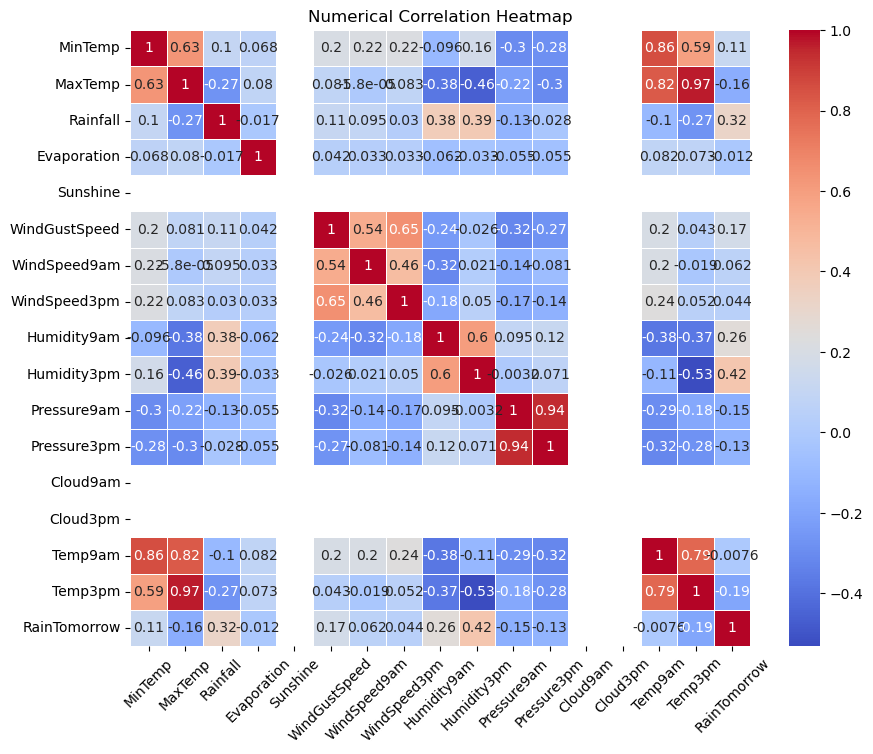

In [102]:
correlation_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Numerical Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

In [103]:
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]
        correlation = correlation_matrix.loc[col1, col2]
        if abs(correlation) > 0.75:  
            if abs(correlation_matrix.loc[col1, 'RainTomorrow']) < abs(correlation_matrix.loc[col2, 'RainTomorrow']):
                if col1 in num_df.columns:
                    num_df = num_df.drop(col1, axis=1)
                    print(f'Dropped {col1}')
            else:
                if col2 in num_df.columns:
                    num_df = num_df.drop(col2, axis=1)
                    print(f'Dropped {col2}')

Dropped Temp9am
Dropped MaxTemp
Dropped Pressure3pm


In [104]:
print(num_df.columns)

Index(['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainTomorrow'],
      dtype='object')


In [105]:
train = train.drop(columns=['Temp9am', 'MaxTemp', 'Pressure3pm'], axis=1)
test = test.drop(columns=['Temp9am', 'MaxTemp', 'Pressure3pm'], axis=1)

print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (29763, 19)
Test set size: (29092, 19)


In [106]:
train.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
2551,Albury,17.874289,-0.000000,2.035258,25.977366,N,6.011471,ESE,NNW,5.564025,8.880860,211.862660,15.131888,6.251498e+15,7.254256,7.848672,23.733027,No,No
133371,Launceston,5.336228,-0.000000,2.035258,25.977366,NW,5.771704,NW,NW,4.832463,8.880860,515.202607,38.332564,6.533183e+15,7.254256,7.848672,13.010398,No,No
1641,Albury,7.484745,0.256638,2.035258,25.977366,ENE,4.150492,NNE,ESE,1.536720,4.194962,580.068254,42.868863,6.463541e+15,7.254256,7.848672,12.003073,No,No
54163,MountGinini,8.987661,0.529784,2.035258,25.977366,NNW,6.493133,NW,NW,8.359711,4.194962,608.638618,55.544373,6.248125e+15,7.254256,7.848672,12.003073,Yes,Yes
20562,NorahHead,15.488036,0.585417,2.035258,25.977366,ENE,5.151881,SSW,ENE,4.036285,9.482109,542.689809,50.519737,6.271766e+15,7.254256,7.848672,16.228421,Yes,No


### 7.3 Feature Selection/Reduction (for categorical columns)

Untuk melihat korelasi kolom-kolom kategorikal dengan kolom 'RainTomorrow' yang juga merupakan kolom kategorikal, kami menggunakan **uji Chi-Square**.

H<sub>0</sub>  = Tidak ada korelasi yang signifikan antara kolom-kolom kategorikal dan 'RainTomorrow'.

H<sub>1</sub> = Ada korelasi yang signifikan antara kolom-kolom kategorikal dan 'RainTomorrow'.

&alpha; = 0.05

In [107]:
from scipy.stats import f_oneway, chi2_contingency

cat_column = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

y = 'RainTomorrow'

p_values = {}

for column in cat_column:
    contingency_table = pd.crosstab(train[column], train[y])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values[column] = p

for column, p_value in p_values.items():
    print(f"The p-value for {column} is \t: {p_value}")

The p-value for Location is 	: 2.912272594597578e-193
The p-value for WindGustDir is 	: 5.348047573003884e-41
The p-value for WindDir9am is 	: 2.7459213860872274e-49
The p-value for WindDir3pm is 	: 1.0848760464283689e-33
The p-value for RainToday is 	: 0.0


Untuk hasil uji Chi-Square pada kolom-kolom di atas, semua p-value dari kolom-kolom kategorikal < 0.05 (alfa).  Hal ini menandakan bahwa ada korelasi yang signifikan antara kolom-kolom tersebut dan 'RainTomorrow'. 

Oleh karena itu, **kita akan menggunakan semua kolom-kolom kategorikal yang ada**.

### 7.4 Final Columns

In [108]:
train.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
2551,Albury,17.874289,-0.000000,2.035258,25.977366,N,6.011471,ESE,NNW,5.564025,8.880860,211.862660,15.131888,6.251498e+15,7.254256,7.848672,23.733027,No,No
133371,Launceston,5.336228,-0.000000,2.035258,25.977366,NW,5.771704,NW,NW,4.832463,8.880860,515.202607,38.332564,6.533183e+15,7.254256,7.848672,13.010398,No,No
1641,Albury,7.484745,0.256638,2.035258,25.977366,ENE,4.150492,NNE,ESE,1.536720,4.194962,580.068254,42.868863,6.463541e+15,7.254256,7.848672,12.003073,No,No
54163,MountGinini,8.987661,0.529784,2.035258,25.977366,NNW,6.493133,NW,NW,8.359711,4.194962,608.638618,55.544373,6.248125e+15,7.254256,7.848672,12.003073,Yes,Yes
20562,NorahHead,15.488036,0.585417,2.035258,25.977366,ENE,5.151881,SSW,ENE,4.036285,9.482109,542.689809,50.519737,6.271766e+15,7.254256,7.848672,16.228421,Yes,No


### 7.5 One-Hot Encoding

In [109]:
combined_df = pd.concat([train, test])

combined_df = pd.get_dummies(combined_df, columns=cat_column)

train = combined_df[:len(train)]
test = combined_df[len(train):]

In [110]:
print("Training set size:", train.shape)
print("Test set size:", test.shape)

Training set size: (29763, 113)
Test set size: (29092, 113)


In [111]:
X_train = train.drop('RainTomorrow', axis=1) 
y_train = train['RainTomorrow']

X_test = test.drop('RainTomorrow', axis=1) 
y_test = test['RainTomorrow']

## 8. Feature Scaling

In [112]:
scaler = MinMaxScaler()
num_columns = ['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
               'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm']

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

## 9. Logistic Regression

In [113]:
os = SMOTE()
X_train, y_train = os.fit_resample(X_train, y_train)
count = Counter(y_train)
print(count)

Counter({'No': 24183, 'Yes': 24183})


In [114]:
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

predicted=lr_model.predict(X_test)

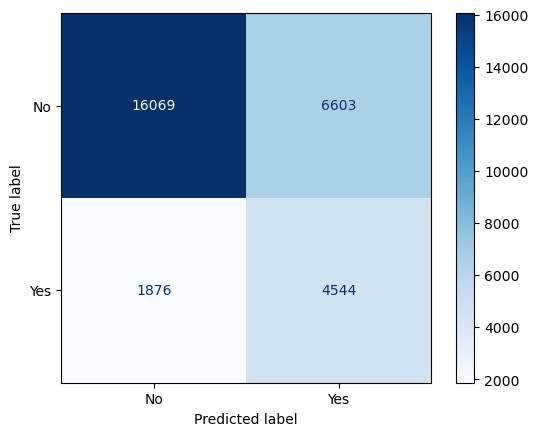

              precision    recall  f1-score   support

          No       0.90      0.71      0.79     22672
         Yes       0.41      0.71      0.52      6420

    accuracy                           0.71     29092
   macro avg       0.65      0.71      0.65     29092
weighted avg       0.79      0.71      0.73     29092



In [119]:
# Plot confusion matrix
plot_confusion_matrix(lr_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

# Print classification report
print(classification_report(y_test, predicted))

## 10. SVM

In [120]:
svm_model = SVC(kernel='linear') 

svm_model.fit(X_train, y_train)

predicted = svm_model.predict(X_test)

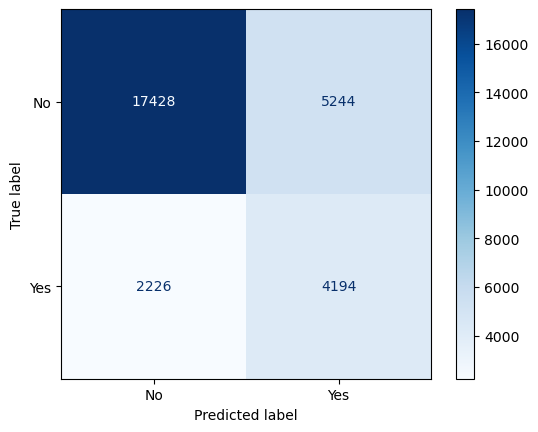

              precision    recall  f1-score   support

          No       0.89      0.77      0.82     22672
         Yes       0.44      0.65      0.53      6420

    accuracy                           0.74     29092
   macro avg       0.67      0.71      0.68     29092
weighted avg       0.79      0.74      0.76     29092



In [121]:
plot_confusion_matrix(svm_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, predicted))